In [66]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [108]:
data=pd.read_csv('train_set.csv',header=None)
data=np.array(data)
n=10000
m=25
x=data[0:n,0:m]
# temp=np.max(x,axis=0)-np.min(x,axis=0)
# x/=temp
temp=[]
for j in range(25):
    k=max(x[:,j:j+1])-min(x[:,j:j+1])
    x[:,j:j+1]/=k
    temp.append(k)
print(x)
t=data[0:n,25]

[[ 0.12453216  0.06201124  0.26817008 ...  0.10718706  0.07314012
  -0.11503089]
 [ 0.07285116 -0.18502732 -0.4293116  ... -0.07688807  0.10985862
  -0.04216139]
 [ 0.17560654  0.46496561 -0.03459844 ...  0.06877445 -0.25832281
  -0.06028491]
 ...
 [-0.03864765  0.10774228  0.19406447 ...  0.03522415 -0.04239407
  -0.20958211]
 [ 0.27229021 -0.33260226 -0.09981736 ... -0.00318725 -0.10781233
   0.33032877]
 [-0.28491451 -0.15324842  0.02775852 ... -0.13277719 -0.02499071
   0.15278272]]


In [97]:
# class1=0
# class2=1
# x=np.reshape([],(0,m))
# t=[]
# for i in range(n):
#     if t1[i]==class1 or t1[i]==class2:
#         x=np.concatenate((x,x1[i:i+1]),axis=0)
#         t.append(t1[i])
        
# n=len(t)

[ 35  43  79  89 126 180 223 271 306 440 457 521 526 573 594]


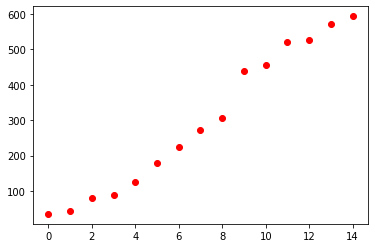

In [65]:
clf = svm.SVC(kernel='linear', C = 0.1)
clf.fit(x,t)
k=np.sort(clf.support_)
print(k)
plt.plot(range(len(k)),k,'ro')

In [68]:
def accuracy(y_pred,t_test):
    a=0
    k=len(t_test)
    for i in range(k):
        if y_pred[i]==t_test[i]:
            a=a+1
    return a/k

In [4]:
def crossScoreL(folds,c):
    b=n//folds
    ac=0
    y=[]
    y1=[]
    f=0
    for i in range(folds):
        temp=np.array(x[f:f+b,0:m])
        temp1=np.array(t[f:f+b])
        f=f+b
        y.append(temp)
        y1.append(temp1)
    
    for i in range(folds):
        x_test=y[i]
        t_test=y1[i]
        x_train=np.reshape([],(0,m))
        t_train=[]
        
        for j in range(folds):
            if i!=j:
                x_train=np.concatenate((x_train,y[j]),axis=0)
                t_train=np.concatenate((t_train,y1[j]),axis=0)
                
        clf = svm.SVC(kernel='linear', C = c)
        clf.fit(x_train,t_train)
        y_pred=clf.predict(x_test)
        ac+=accuracy(t_test,y_pred)
    
    return ac/folds

In [5]:
def crossScoreP(folds,c,d):
    b=n//folds
    ac=0
    y=[]
    y1=[]
    f=0
    for i in range(folds):
        temp=np.array(x[f:f+b,0:m])
        temp1=np.array(t[f:f+b])
        f=f+b
        y.append(temp)
        y1.append(temp1)
    
    for i in range(folds):
        x_test=y[i]
        t_test=y1[i]
        x_train=np.reshape([],(0,m))
        t_train=[]
        
        for j in range(folds):
            if i!=j:
                x_train=np.concatenate((x_train,y[j]),axis=0)
                t_train=np.concatenate((t_train,y1[j]),axis=0)
                
        clf = svm.SVC(kernel='poly', C = c,degree=d)
        clf.fit(x_train,t_train)
        y_pred=clf.predict(x_test)
        ac+=accuracy(t_test,y_pred)
    
    return ac/folds

In [95]:
def crossScoreR(folds,c,gm):
    b=n//folds
    ac=0
    y=[]
    y1=[]
    f=0
    for i in range(folds):
        temp=np.array(x[f:f+b,0:m])
        temp1=np.array(t[f:f+b])
        f=f+b
        y.append(temp)
        y1.append(temp1)
    
    for i in range(folds):
        x_test=y[i]
        t_test=y1[i]
        x_train=np.reshape([],(0,m))
        t_train=[]
        
        for j in range(folds):
            if i!=j:
                x_train=np.concatenate((x_train,y[j]),axis=0)
                t_train=np.concatenate((t_train,y1[j]),axis=0)
             
        clf = svm.SVC(kernel='rbf', C = c,gamma=gm)
        clf.fit(x_train,t_train)
        y_pred=clf.predict(x_test)
        ac+=accuracy(t_test,y_pred)
    
    return ac/folds

In [7]:
def crossScoreS(folds,c,gm):
    b=n//folds
    ac=0
    y=[]
    y1=[]
    f=0
    for i in range(folds):
        temp=np.array(x[f:f+b,0:m])
        temp1=np.array(t[f:f+b])
        f=f+b
        y.append(temp)
        y1.append(temp1)
    
    for i in range(folds):
        x_test=y[i]
        t_test=y1[i]
        x_train=np.reshape([],(0,m))
        t_train=[]
        
        for j in range(folds):
            if i!=j:
                x_train=np.concatenate((x_train,y[j]),axis=0)
                t_train=np.concatenate((t_train,y1[j]),axis=0)
             
        clf = svm.SVC(kernel='sigmoid', C = c,gamma=gm)
        clf.fit(x_train,t_train)
        y_pred=clf.predict(x_test)
        ac+=accuracy(t_test,y_pred)
    
    return ac/folds

In [8]:
def scoreL(c):
    clf=svm.SVC(kernel='linear',C=c)
    clf.fit(x,t)
    y_pred=clf.predict(x)
    return accuracy(t,y_pred)

In [9]:
def scoreP(c,d):
    clf=svm.SVC(kernel='poly',degree=d,C=c)
    clf.fit(x,t)
    y_pred=clf.predict(x)
    return accuracy(t,y_pred)

In [70]:
def scoreR(c,gm):
    clf=svm.SVC(kernel='rbf',C=c,gamma=gm)
    clf.fit(x,t)
    y_pred=clf.predict(x)
    return accuracy(t,y_pred)

In [11]:
def scoreS(c,gm):
    clf=svm.SVC(kernel='sigmoid',C=c,gamma=gm)
    clf.fit(x,t)
    y_pred=clf.predict(x)
    return accuracy(t,y_pred)

In [41]:
def tuneL(folds):
    arr=np.linspace(0.01,0.1,20)
    c=arr[0]
    y=[]
    score=crossScoreL(4,c)
    for i in arr:
        temp=crossScoreL(4,i)
        y.append(temp)
        if temp>score:
            score=temp
            c=i
    plt.plot(arr,y,'ro')
    plt.xlabel('C')
    plt.ylabel('Cross-Validation Accuracy')
    return (c,score)

(0.03842105263157895, 0.8903333333333334)

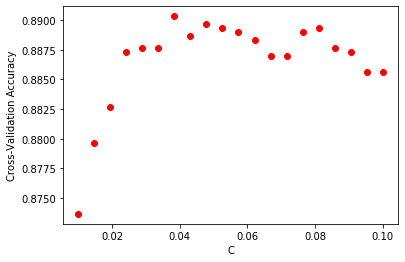

In [42]:
tuneL(4)

In [43]:
# print(scoreL(0.062))
crossScoreL(4,0.038)

0.8903333333333334

In [27]:
def tuneP1(folds):
    arr1=np.linspace(0.1,1.5,20)
    arr2=range(1,10)
    c=0.1
    degree=2
    y=[]
    score=crossScoreP(4,c,degree)
    for i in arr1:
#         for j in arr2:
        temp=crossScoreP(4,i,degree)
        y.append(temp)
        if temp>score:
            score=temp
            c=i
#             degree=j
    plt.plot(arr1,y,'ro')
    plt.xlabel('C')
    plt.ylabel('Cross-Validation Accuracy')
    plt.title('Degree=5')
    return (c,degree,score)

In [28]:
def tuneRc(folds,gm):
    arrc=np.linspace(0.1,1.5,20)
    arrg=range(1,10)
    c=0.1
    y=[]
    score=crossScoreR(4,c,gm)
    for i in arrc:
        temp=crossScoreR(4,i,gm)
        y.append(temp)
        if temp>score:
            score=temp
            c=i
    plt.plot(arrc,y,'ro')
    plt.xlabel('C')
    plt.ylabel('Cross-Validation Accuracy')
    plt.title('Gamma=0.1')
    return (c,gm,score)

In [29]:
def tuneRg(folds,c):
    arrg=np.linspace(1,5,10)
    gm=1
    y=[]
    score=crossScoreR(4,c,gm)
    for i in arrg:
        temp=crossScoreR(4,c,i)
        y.append(temp)
        if temp>score:
            score=temp
            gm=i
    plt.plot(arrg,y,'ro')
    plt.xlabel('Gamma')
    plt.ylabel('Cross-Validation Accuracy')
    plt.title('C=1')
    return (c,gm,score)

In [85]:
def plotR(arrx,arry):
    lenx=len(arrx)
    leny=len(arry)
    Z=np.zeros((leny,lenx))
    for i in range(leny):
        for j in range(lenx):
            Z[i,j]=crossScoreR(4,arrx[j],arry[i])
    X,Y=np.meshgrid(arrx,arry)
#     print(Z)
    plt.contourf(X, Y, Z, 20, cmap='RdGy')
    plt.xlabel('C')
    plt.ylabel('Gamma')
    plt.colorbar()              

In [13]:
def plotS(arrx,arry):
    lenx=len(arrx)
    leny=len(arry)
    Z=np.zeros((leny,lenx))
    for i in range(leny):
        for j in range(lenx):
            Z[i,j]=crossScoreS(4,arrx[j],arry[i])
    X,Y=np.meshgrid(arrx,arry)
#     print(Z)
    plt.contourf(X, Y, Z, 20, cmap='RdGy')
    plt.xlabel('C')
    plt.ylabel('Gamma')
    plt.colorbar()              

In [14]:
def plotP(arrx,arry):
    lenx=len(arrx)
    leny=len(arry)
    Z=np.zeros((leny,lenx))
    for i in range(leny):
        for j in range(lenx):
            Z[i,j]=crossScoreP(4,arrx[j],arry[i])
    X,Y=np.meshgrid(arrx,arry)
#     print(Z)
    plt.contourf(X, Y, Z, 20, cmap='RdGy')
    plt.xlabel('C')
    plt.ylabel('Degree')
    plt.colorbar()              

In [114]:
def tuneR(folds):
    arrc=np.linspace(5,6,10)
    arrg=np.linspace(4,5,10)
    c=arrc[0]
    gm=arrg[0]
    y=[]
    score=crossScoreR(4,c,gm)
    for i in arrc:
        for j in arrg:
            temp=crossScoreR(4,i,j)
            if temp>score:
                score=temp
                c=i
                gm=j
    plotR(arrc,arrg)
    return (c,gm,score)

(5.333333333333333, 4.777777777777778, 0.9688)

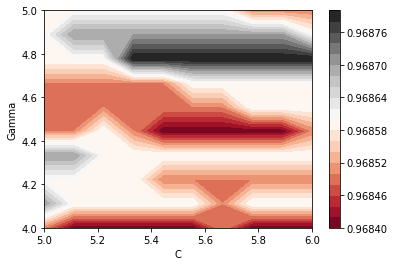

In [115]:
tuneR(4)

In [121]:
c=5.6
gm=4.8
crossScoreR(4,c,gm)
# scoreR(c,gm)

0.9688

In [33]:
c=2.22
gm=2.88
crossScoreR(4,c,gm)
# scoreR(c,gm)

0.9526666666666667

In [85]:
def tuneP(folds):
    arrc=np.linspace(0.01,0.2,20)
    arrg=range(1,7)
    c=arrc[0]
    degree=arrg[0]
    y=[]
    score=crossScoreP(4,c,degree)
    for i in arrc:
        for j in arrg:
            temp=crossScoreP(4,i,j)
            if temp>score:
                score=temp
                c=i
                degree=j
    plotP(arrc,arrg)
    return (c,degree,score)

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base

(0.13, 3, 0.8856666666666666)

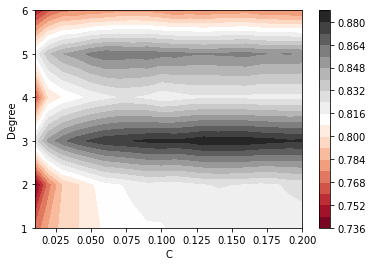

In [86]:
tuneP(4)

In [87]:
c=0.13
degree=3
print(scoreP(c,degree))
# crossScoreP(4,c,degree)

/home/raghav/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9386666666666666


In [99]:
def tuneS(folds):
    arrc=np.linspace(0.01,0.5,10)
    arrg=np.linspace(0.01,0.1,10)
    c=arrc[0]
    gm=arrg[0]
    y=[]
    score=crossScoreS(4,c,gm)
    for i in arrc:
        for j in arrg:
            temp=crossScoreS(4,i,j)
            if temp>score:
                score=temp
                c=i
                gm=j
    plotS(arrc,arrg)
    return (c,gm,score)

(0.44555555555555554, 0.020000000000000004, 0.8023333333333333)

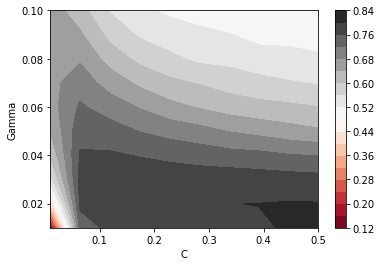

In [100]:
tuneS(4)

In [102]:
scoreS(0.44,0.02)

0.8086666666666666

In [117]:
data=pd.read_csv('test_set.csv',header=None)
data=np.array(data)
x_test=data[0:2000,0:25]
for j in range(25):
    x_test[:,j:j+1]/=temp[j]
c=5.6
gm=4.8
clf = svm.SVC(kernel='rbf', C = c,gamma=gm)
clf.fit(x,t)
y_pred=clf.predict(x_test)
print(x_test)

[[-0.00689337 -0.27141466 -0.15244487 ...  0.29542691 -0.28780128
   0.14797602]
 [-0.14569249 -0.01814229  0.07339102 ...  0.06610175 -0.16875061
   0.18705809]
 [ 0.26445986  0.10315468  0.11186149 ... -0.14956707 -0.02296326
  -0.06497307]
 ...
 [-0.05737754  0.15848245 -0.09814008 ...  0.00589896  0.06247405
  -0.10174456]
 [ 0.13864876 -0.10453859  0.2549979  ... -0.06982775 -0.00837911
   0.20333393]
 [ 0.02005945 -0.1250497  -0.23485471 ...  0.08428563 -0.22487236
  -0.09028744]]


In [118]:
print(y_pred)

[3. 5. 2. ... 7. 2. 5.]


In [119]:
y_pred=np.array(y_pred,dtype=int)
z=range(2000)
dict = {'id' : z, 'class' : y_pred}
df = pd.DataFrame(dict)
df.to_csv('pred3.csv', index=False)